![](https://www.kolpaper.com/wp-content/uploads/2020/04/hd-fifa-20-wallpaper.jpg)

# **Exploratory data analysis - FIFA 20**

## Table of contents
1) **Import libraries**

2) **Data Exploration**

3) **Cleaning data**

4) **Data Visualization**

5) **Data anaylsis**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno # for finding missing values in the data
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('players_20.csv')
print('Completed')

Completed


## Data Exploration

* Now, let's begin data exploration to gain insights about our data.

In [6]:
#Shape of the data
data.shape

(18278, 104)

* As we can see there are **18278** rows and **104** columns

In [7]:
#Preview the data
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [8]:
#Columns in the data
list(data.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [9]:
#Data tyoe for each column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [10]:
#Removing uselesscolumns for this analysis
uselesscolumn = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number',]
data = data.drop(uselesscolumn,axis = 1)
data

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


<AxesSubplot:>

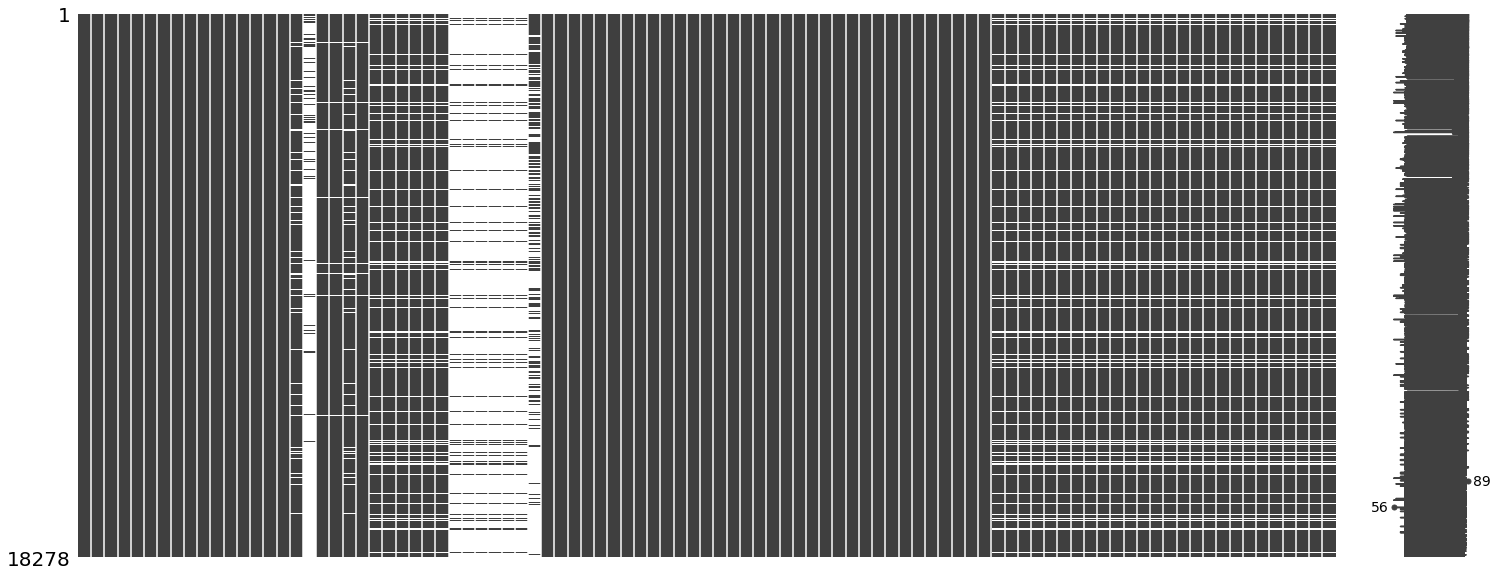

In [11]:
#Missing data
msno.matrix(data)

In [12]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
data[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [13]:
for col in columns:
    data[col] = data[col].str.split('+').str[0]
    
data[columns] = data[columns].fillna(0)

In [15]:
#changig the dtype to 'int'
data[columns] = data[columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [16]:
data[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [17]:
#replacig 0 with the mea of the column
for col in columns:
    data[col] = data[col].replace(0,(data[col].mean()))

In [18]:
attributes = ['dribbling','defending','physic','passing','shooting','pace']
data[attributes]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [19]:
data[attributes].isna().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [20]:
for att in attributes:
    data[att] = data[att].fillna(data[att].mean())

## Data Visualization

### How many player preferred foot is left?

In [21]:
data['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

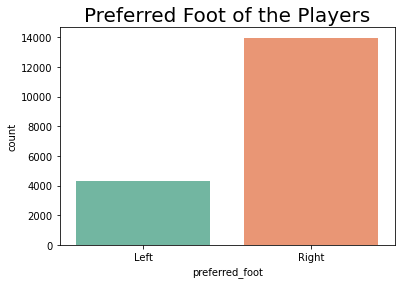

In [22]:
sns.countplot(x=data['preferred_foot'],linewidth=5, palette = 'Set2')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

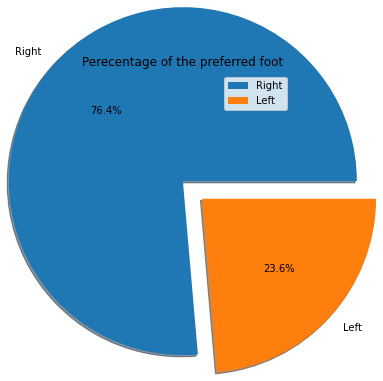

In [23]:
figsize = ()
label = data['preferred_foot'].value_counts().index
name = data['preferred_foot'].value_counts()
explode = [0,0.3]
plt.pie(name,labels = label,shadow = True,autopct='%1.1f%%',explode =explode, radius = 2)
plt.title('Perecentage of the preferred foot')
plt.legend()
plt.show()

### Which country has maximum number of players?

In [24]:
top = data['nationality'].value_counts().head(10)
top

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

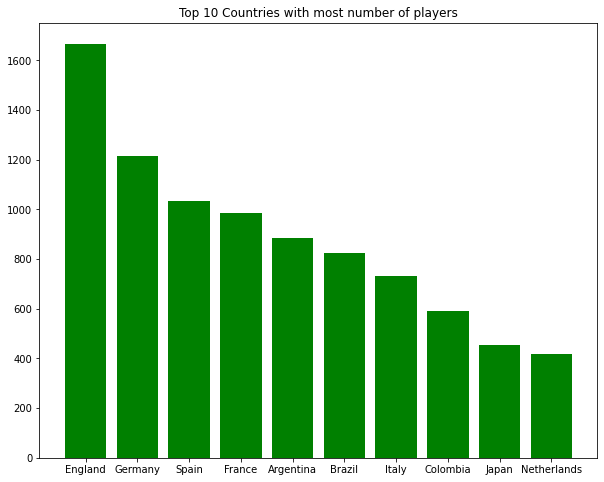

In [25]:
fig,ax = plt.subplots(figsize = (10,8))
ar = top.values
ra = top.index
ax.bar(ra,ar, color = 'green')
ax.set_title(('Top 10 Countries with most number of players'))
plt.show()

### Potential of Top 10 FIFA countries

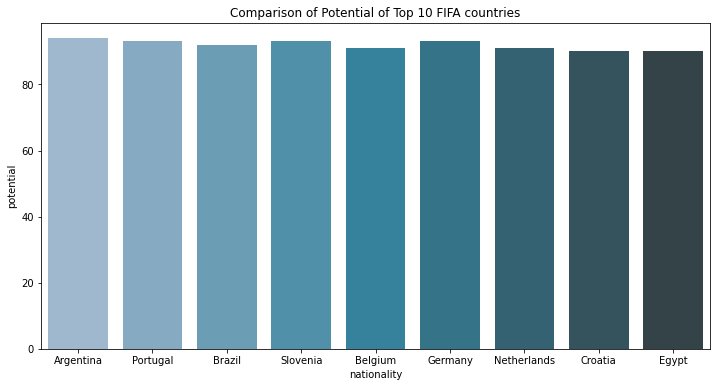

In [26]:
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'nationality', y = 'potential', data = data.head(10), palette='PuBuGn_d')
plt.title('Comparison of Potential of Top 10 FIFA countries')
plt.show()

### Potential of Top 10 FIFA players

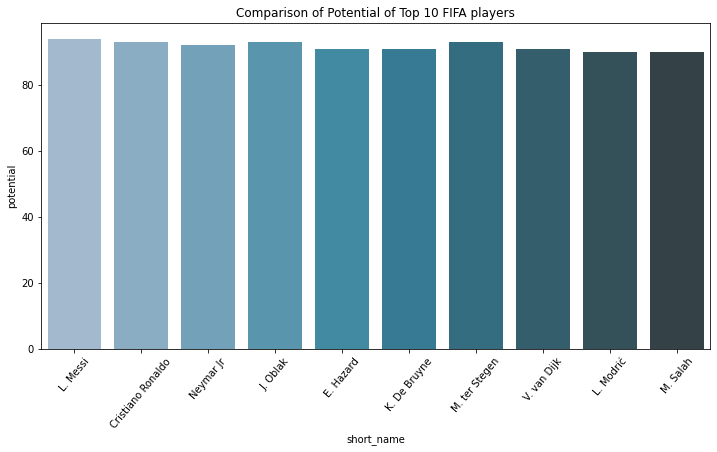

In [27]:
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'short_name', y = 'potential', data = data.head(10), palette='PuBuGn_d')
plt.title('Comparison of Potential of Top 10 FIFA players')
plt.xticks(rotation = 50)
plt.show()

## Data anaylsis

### Average player height in FIFA

In [28]:
tall = data['height_cm'].mean()
print(str(tall) + " is the average height in fifa")

181.36218404639456 is the average height in fifa


### Average player weight in FIFA

In [29]:
heavy = data['weight_kg'].mean()
print(str(heavy) + " is the average weight in fifa")

75.2763431447642 is the average weight in fifa


### Oldest players

In [30]:
data.sort_values(by = 'age' , ascending = False)[['short_name','club','nationality','overall', 'age' ]].head()

,short_name,club,nationality,overall,age
13003,H. Sulaimani,Al Ahli,Saudi Arabia,63,42
11832,C. Muñoz,CD Universidad de Concepción,Argentina,64,42
200,G. Buffon,Juventus,Italy,83,41
3706,C. Lucchetti,Atlético Tucumán,Argentina,72,41
10665,F. Kippe,Lillestrøm SK,Norway,65,41


### Youngest players

In [31]:
data.sort_values(by = 'age' , ascending = True)[['short_name','club','nationality','overall', 'age' ]].head()

,short_name,club,nationality,overall,age
18171,J. Starbuck,Grimsby Town,England,49,16
4764,A. Hložek,Sparta Praha,Czech Republic,70,16
18243,E. Sartorius,Lincoln City,England,48,16
17827,D. Burns,St. Patrick's Athletic,Northern Ireland,52,16
17614,D. Obbekjær,Odense Boldklub,Denmark,53,16


### Best ball controlers

In [32]:
data.sort_values(by = 'skill_ball_control' , ascending = False)[['short_name','club','nationality','overall', 'age','skill_ball_control']].head()

,short_name,club,nationality,overall,age,skill_ball_control
0,L. Messi,FC Barcelona,Argentina,94,32,96
2,Neymar Jr,Paris Saint-Germain,Brazil,92,27,95
4,E. Hazard,Real Madrid,Belgium,91,28,94
62,Isco,Real Madrid,Spain,86,27,93
54,L. Insigne,Napoli,Italy,87,28,93


### Best defenders

In [33]:
data.sort_values(by = 'defending' , ascending = False)[['short_name','club','nationality','overall', 'age','defending']].head()

,short_name,club,nationality,overall,age,defending
16,G. Chiellini,Juventus,Italy,89,34,90.0
7,V. van Dijk,Liverpool,Netherlands,90,27,90.0
35,D. Godín,Inter,Uruguay,88,33,89.0
11,K. Koulibaly,Napoli,Senegal,89,28,89.0
49,M. Hummels,Borussia Dortmund,Germany,87,30,89.0


### Best shooters

In [34]:
data.sort_values(by = 'shooting' , ascending = False)[['short_name','club','nationality','overall', 'age','shooting']].head()

,short_name,club,nationality,overall,age,shooting
1,Cristiano Ronaldo,Juventus,Portugal,93,34,93.0
0,L. Messi,FC Barcelona,Argentina,94,32,92.0
12,H. Kane,Tottenham Hotspur,England,89,25,91.0
17,S. Agüero,Manchester City,Argentina,89,31,90.0
19,L. Suárez,FC Barcelona,Uruguay,89,32,89.0


### Best dribllers

In [35]:
data.sort_values(by = 'dribbling' , ascending = False)[['short_name','club','nationality','overall', 'age','dribbling']].head()

,short_name,club,nationality,overall,age,dribbling
0,L. Messi,FC Barcelona,Argentina,94,32,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,27,95.0
4,E. Hazard,Real Madrid,Belgium,91,28,94.0
41,Bernardo Silva,Manchester City,Portugal,87,24,92.0
48,D. Mertens,Napoli,Belgium,87,32,91.0


### Quikest players

In [36]:
data.sort_values(by = 'movement_acceleration' , ascending = False)[['short_name','club','nationality','overall', 'age','movement_acceleration']].head()

,short_name,club,nationality,overall,age,movement_acceleration
2167,Adama Traoré,Wolverhampton Wanderers,Spain,74,23,97
10,K. Mbappé,Paris Saint-Germain,France,89,20,96
26,R. Sterling,Manchester City,England,88,24,96
754,I. Sarr,Watford,Senegal,78,21,95
197,Lucas Moura,Tottenham Hotspur,Brazil,83,26,95


### Highest earners

In [37]:
data.sort_values(by = 'wage_eur' , ascending = False)[['short_name','club','nationality','overall', 'age','wage_eur']].head()

,short_name,club,nationality,overall,age,wage_eur
0,L. Messi,FC Barcelona,Argentina,94,32,565000
4,E. Hazard,Real Madrid,Belgium,91,28,470000
1,Cristiano Ronaldo,Juventus,Portugal,93,34,405000
5,K. De Bruyne,Manchester City,Belgium,91,28,370000
22,A. Griezmann,FC Barcelona,France,89,28,370000
